In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
import cv2

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from eigenface import EigenFaces
from img_preprocessing import preprocess_images


import pickle


import os
import cv2
import numpy as np
import dlib
from imutils.face_utils import FaceAligner
from imutils.face_utils import rect_to_bb
from img_preprocessing import preprocess_images
from skimage.util import random_noise

In [2]:
def load_images(path=None, resize=(500, 500)):
    if path is None:
        path = os.path.join(os.getcwd(), 'images')

    images = []
    students = []

    for student in os.listdir(path):
        student_path = os.path.join(path, student)
        
        if os.path.isdir(student_path):
        
            for image in os.listdir(student_path):
                image_path = os.path.join(student_path, image)
        
                if os.path.isfile(image_path):
                    image = cv2.imread(image_path)                    
                    
                    if image.size != resize:
                        image = cv2.resize(image, resize)
                                        
                        
                    images.append(image)
                    students.append(student)
    
    return images, students

In [3]:
test_images, test_students = load_images('test', resize=(250, 250))

In [4]:
with open("models/eigenface_recognizer_aligned.pkl", "rb") as f:
    eigenface_recognizer = pickle.load(f)    


face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

predictor = dlib.shape_predictor("trials/shape_predictor_68_face_landmarks.dat")
fa = FaceAligner(predictor, desiredFaceWidth=250, desiredFaceHeight=250)


In [5]:

def detect_bounding_box(img):    

    faces = face_classifier.detectMultiScale(
        img, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
    )
    

    return faces

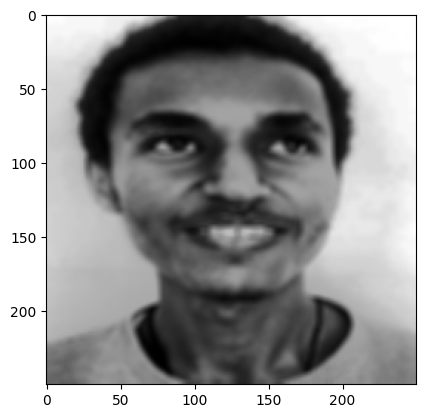

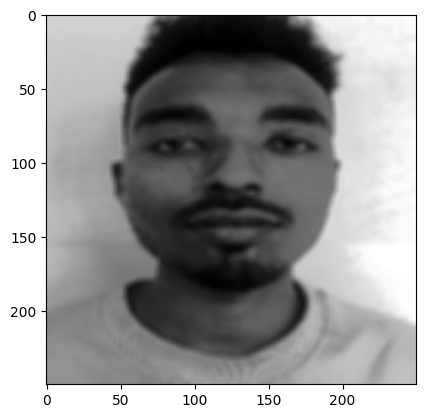

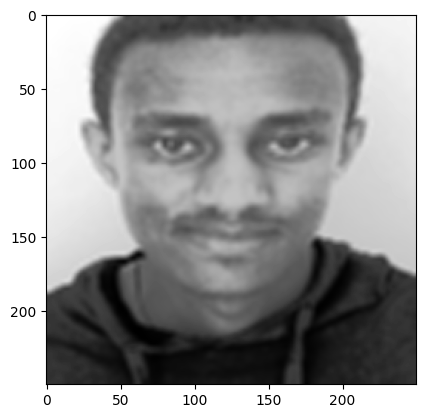

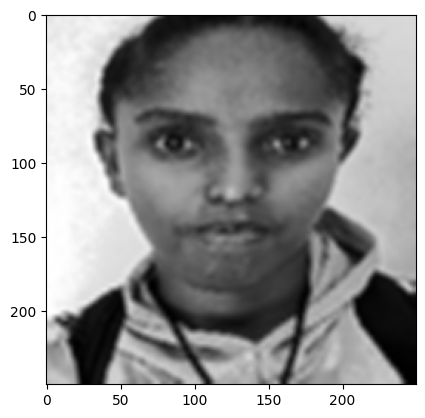

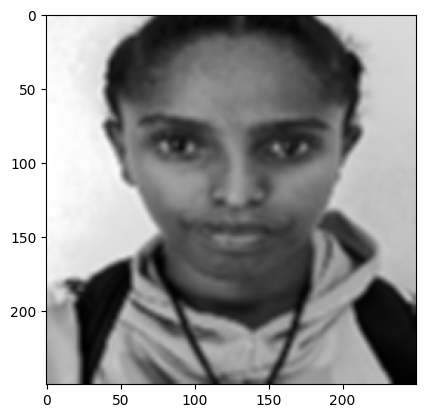

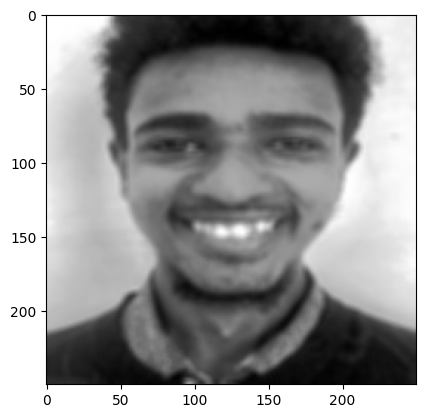

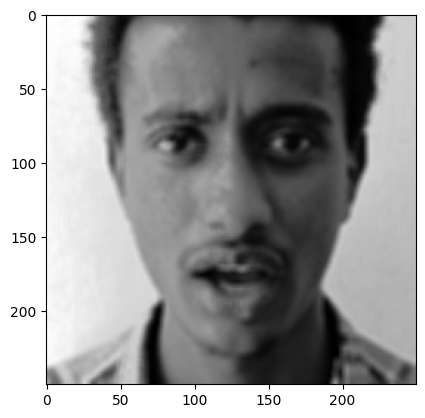

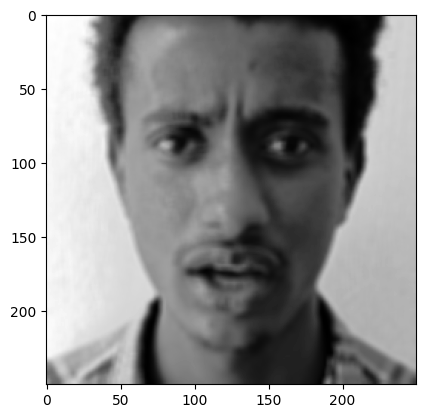

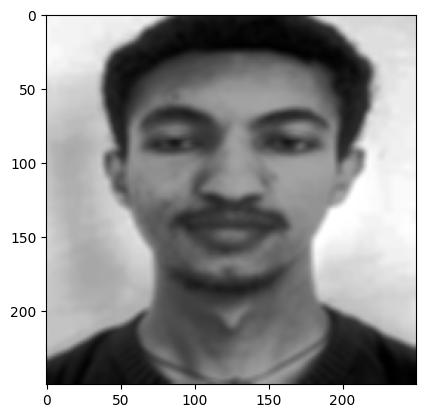

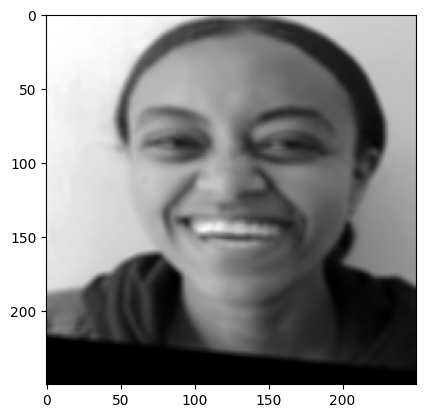

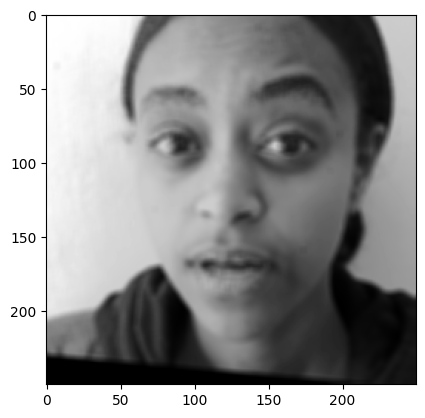

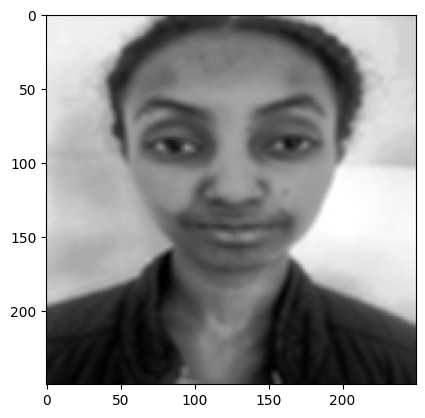

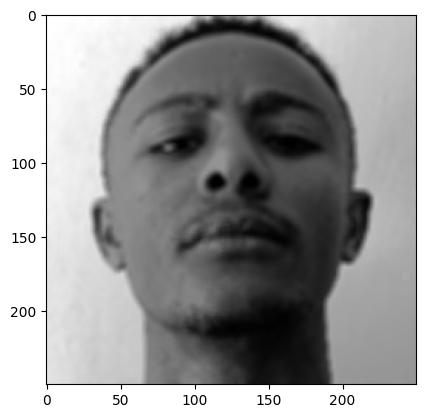

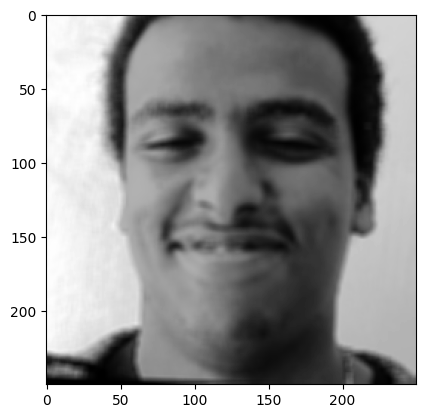

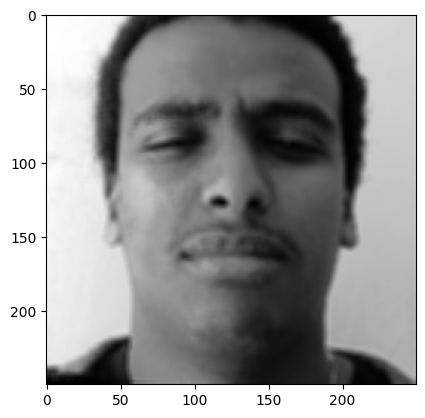

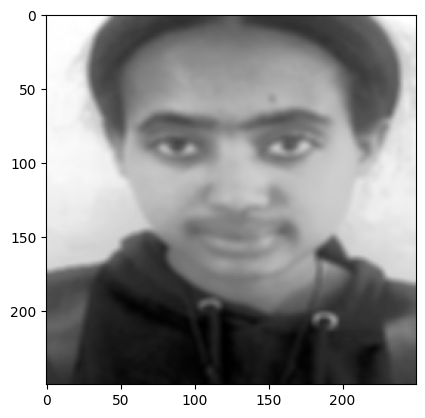

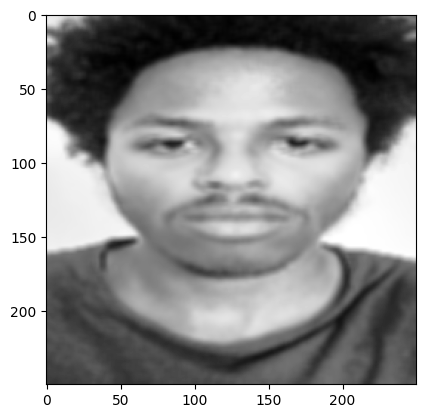

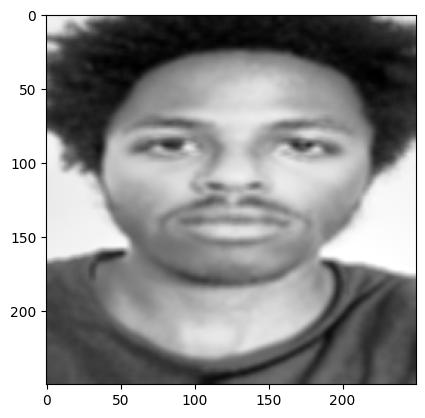

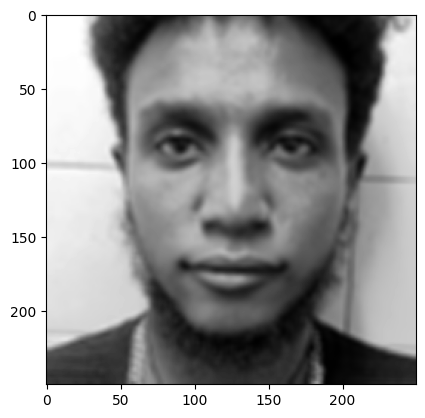

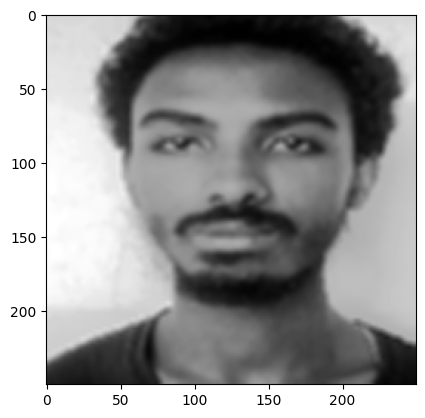

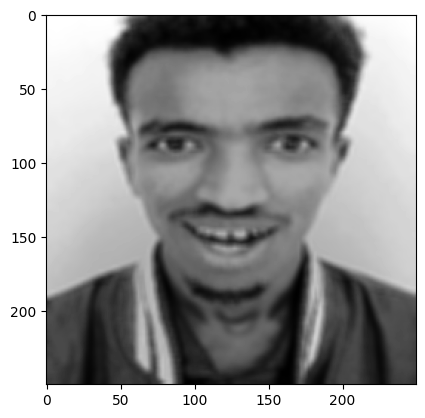

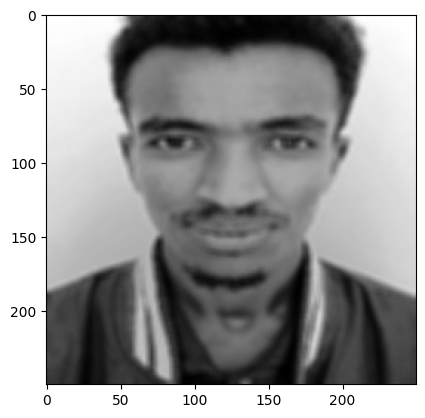

In [6]:
y_pred = []

for image, student in zip(test_images, test_students):  
    original_image = image

    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)      
    
    faces = detect_bounding_box(image)

    if len(faces):
        x, y, w, h = faces[0]

        faceAligned = fa.align(original_image, image, dlib.rectangle(x, y, x + h, y + w))

        faceAligned = cv2.cvtColor(faceAligned, cv2.COLOR_BGR2GRAY)

        imgs = preprocess_images([faceAligned])                         

        predicted = eigenface_recognizer.predict(imgs)

        if predicted[0] == student:
            plt.imshow(imgs[0].reshape((250, 250)), cmap="gray")
            plt.show()


        y_pred.append(predicted[0])        
    
    else:
        y_pred.append("Notface")
    

In [7]:
accuracy_score(test_students, y_pred)

0.3548387096774194

In [8]:
y_pred

['Abraham Wendmeneh',
 'Tiruzer Tsedeke',
 'Notface',
 'Dawit_Abebe',
 'Yosef Muluneh',
 'Melkishi Tesfaye',
 'Biniyam Haile',
 'Biniyam Haile',
 'Biniyam Haile',
 'Fasika_Fikadu',
 'Fasika_Fikadu',
 'Metsakal Zeleke',
 'Metsakal Zeleke',
 'Deribew_Shimels',
 'Yosef Aweke',
 'Esayas Nigussie',
 'Esayas Nigussie',
 'Sosina Esayas',
 'Esayas Nigussie',
 'Etsubdink Awoke',
 'Etsubdink Awoke',
 'Fasika_Fikadu',
 'Dagmawi_Tensay',
 'Fraol Mulugeta',
 'Tiruzer Tsedeke',
 'Geleta Daba',
 'Geleta Daba',
 'Yohannes Desta',
 'Kidus Hunegnaw',
 'Fraol Mulugeta',
 'Deribew_Shimels',
 'Mariam Yohannes',
 'Mariam Yohannes',
 'Melkishi Tesfaye',
 'Amir Ahmedin',
 'Amir Ahmedin',
 'Abdissa Degefu',
 'Milion Tolesa',
 'Biniyam Haile',
 'Yosef Aweke',
 'Melkishi Tesfaye',
 'Fraol Mulugeta',
 'Sahib Semahegn',
 'Sahib Semahegn',
 'Notface',
 'Dawit_Abebe',
 'Sosina Esayas',
 'Fraol Mulugeta',
 'Esayas Nigussie',
 'Melkishi Tesfaye',
 'Melkishi Tesfaye',
 'Yosef Aweke',
 'Dawit_Abebe',
 'Yohannes Dessie',